# Telecom Churn - ML Group Case Study

Group Facilitator Name : Shiva Kumar

Group Facilitator Email : shivajeekumar@gmail.com

Team Member Name : Anushka Saini

Team Member Email : anusaini.as@gmail.com

## Problem Statement

Telecom Industry need to retain its customer in the competitive environment where customer churn is more than its acquisition.

To reduce customer churn,we need to predict which customers are at high risk of churn in prepaid model.

In this project we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

 

## The solution is divided into the following sections:

Data understanding and exploration

Data cleaning

Data preparation

Model building and evaluation

### 1. Data Understanding and Exploration

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [394]:
#Import the package 
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date,datetime
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE


In [395]:
import warnings
warnings.filterwarnings('ignore')

In [396]:
#Reading dataset
telecom=pd.read_csv(r"telecom_churn_data.csv")

In [397]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [398]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [399]:
telecom.shape

(99999, 226)

Here we have rows=99999 and columns=226

In [400]:
(100*(telecom.isnull().sum()/len(telecom.index)),2)# Checking for null values 

(mobile_number                0.000000
 circle_id                    0.000000
 loc_og_t2o_mou               1.018010
 std_og_t2o_mou               1.018010
 loc_ic_t2o_mou               1.018010
 last_date_of_month_6         0.000000
 last_date_of_month_7         0.601006
 last_date_of_month_8         1.100011
 last_date_of_month_9         1.659017
 arpu_6                       0.000000
 arpu_7                       0.000000
 arpu_8                       0.000000
 arpu_9                       0.000000
 onnet_mou_6                  3.937039
 onnet_mou_7                  3.859039
 onnet_mou_8                  5.378054
 onnet_mou_9                  7.745077
 offnet_mou_6                 3.937039
 offnet_mou_7                 3.859039
 offnet_mou_8                 5.378054
 offnet_mou_9                 7.745077
 roam_ic_mou_6                3.937039
 roam_ic_mou_7                3.859039
 roam_ic_mou_8                5.378054
 roam_ic_mou_9                7.745077
 roam_og_mou_6           

In [401]:
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

Here we can see there are columns which have 1 to 8 percent of missing values and some columns have more than 72% of missing values .


In [402]:
telecom.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

Here we can see there are 12 objects which are dates which is not needed in future.
Also there are categorical variables like fb_user_6,night_pack_user_6 etc.

# 2.Data Cleaning

Let's fill the null values with zero which are necessary.

In [403]:
telecom["total_rech_data_6"].fillna(0,inplace=True)#filing zero in null values of total recharge data of june

In [404]:
telecom["total_rech_data_7"].fillna(0,inplace=True)

In [405]:
telecom["total_rech_data_8"].fillna(0,inplace=True)

In [406]:
telecom["total_rech_data_9"].fillna(0,inplace=True)

In [407]:
telecom["av_rech_amt_data_6"].fillna(0,inplace=True)

In [408]:
telecom["av_rech_amt_data_7"].fillna(0,inplace=True)

In [409]:
telecom["av_rech_amt_data_8"].fillna(0,inplace=True)

In [410]:
telecom["av_rech_amt_data_9"].fillna(0,inplace=True)

Drop the columns which are not important for analysis

In [411]:
telecom.drop(axis=1,labels=['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9'],inplace=True)

Let's drop columns which have more than 72% of null values.

In [412]:
telecom= telecom.drop(telecom.columns[telecom.apply(lambda col: col.isnull().sum()/len(telecom) > 0.72)], axis=1)#dropping the columns which have null value > than 72

In [413]:
(100*(telecom.isnull().sum()/len(telecom.index)),2)# Checking for null values 

(mobile_number          0.000000
 circle_id              0.000000
 loc_og_t2o_mou         1.018010
 std_og_t2o_mou         1.018010
 loc_ic_t2o_mou         1.018010
 arpu_6                 0.000000
 arpu_7                 0.000000
 arpu_8                 0.000000
 arpu_9                 0.000000
 onnet_mou_6            3.937039
 onnet_mou_7            3.859039
 onnet_mou_8            5.378054
 onnet_mou_9            7.745077
 offnet_mou_6           3.937039
 offnet_mou_7           3.859039
 offnet_mou_8           5.378054
 offnet_mou_9           7.745077
 roam_ic_mou_6          3.937039
 roam_ic_mou_7          3.859039
 roam_ic_mou_8          5.378054
 roam_ic_mou_9          7.745077
 roam_og_mou_6          3.937039
 roam_og_mou_7          3.859039
 roam_og_mou_8          5.378054
 roam_og_mou_9          7.745077
 loc_og_t2t_mou_6       3.937039
 loc_og_t2t_mou_7       3.859039
 loc_og_t2t_mou_8       5.378054
 loc_og_t2t_mou_9       7.745077
 loc_og_t2m_mou_6       3.937039
 loc_og_t2

Here we can see there are columns of last date which have 1 percent missing values.
Somtimes NaN values have some meaning in it.NaN value can be considered as zero.

In [414]:
telecom.fillna(0,inplace=True)# filling the remaning data with zero

In [415]:
telecom.isnull().sum()

mobile_number          0
circle_id              0
loc_og_t2o_mou         0
std_og_t2o_mou         0
loc_ic_t2o_mou         0
arpu_6                 0
arpu_7                 0
arpu_8                 0
arpu_9                 0
onnet_mou_6            0
onnet_mou_7            0
onnet_mou_8            0
onnet_mou_9            0
offnet_mou_6           0
offnet_mou_7           0
offnet_mou_8           0
offnet_mou_9           0
roam_ic_mou_6          0
roam_ic_mou_7          0
roam_ic_mou_8          0
roam_ic_mou_9          0
roam_og_mou_6          0
roam_og_mou_7          0
roam_og_mou_8          0
roam_og_mou_9          0
loc_og_t2t_mou_6       0
loc_og_t2t_mou_7       0
loc_og_t2t_mou_8       0
loc_og_t2t_mou_9       0
loc_og_t2m_mou_6       0
loc_og_t2m_mou_7       0
loc_og_t2m_mou_8       0
loc_og_t2m_mou_9       0
loc_og_t2f_mou_6       0
loc_og_t2f_mou_7       0
loc_og_t2f_mou_8       0
loc_og_t2f_mou_9       0
loc_og_t2c_mou_6       0
loc_og_t2c_mou_7       0
loc_og_t2c_mou_8       0


In [416]:
telecom.shape

(99999, 190)

There is no missing value in data set.

Since we are working on prepaid high valued  customer and on the basis of usage-based churn .We have to find out customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

According to customer behaviour 

1.Good phase customer is happy.(June -July)

2.Action phase where customer may become churn .We have to take action in this phase so that customer should not churn.(August)

3.Churn phase in this phase customer already churn .We are going to tag churn in this phase.(September)

Filtering High valued customer .
For this we need to find Data recharge amount of june and july.And data recharge amount is the total recharge data*average recharge amount data

In [417]:
telecom["Data_recharge_amount _of_6"]=telecom["total_rech_data_6"] * telecom["av_rech_amt_data_6"]#for june data recharge

In [418]:
telecom["Data_recharge_amount _of_7"]=telecom["total_rech_data_7"] * telecom["av_rech_amt_data_7"]#for july data recharge

In [419]:
telecom["Total_recharge_amount_6"]=telecom["Data_recharge_amount _of_6"]+ telecom["total_rech_amt_6"]#Total recharge is equal to data recharge +call recharge of june

In [420]:
telecom["Total_recharge_amount_7"]=telecom["Data_recharge_amount _of_7"]+ telecom["total_rech_amt_7"]#Total recharge is equal to data recharge +call recharge of july

In [421]:
telecom["Grand_total_recharge_amount"]=(telecom["Total_recharge_amount_6"] +telecom ["Total_recharge_amount_7"])/2 #Grand total for high valued customer

Here we got  grand total recharge amount of customer .The high valued customer are those who use more than 70% of the amount.

In [422]:
telecom["Grand_total_recharge_amount"].describe([0.70])

count    99999.000000
mean       485.328068
std        869.423594
min          0.000000
50%        275.000000
70%        478.000000
max      61236.000000
Name: Grand_total_recharge_amount, dtype: float64

Now we got 70 percentile of grand total recharge amount=478

In [423]:
telecom=telecom[telecom["Grand_total_recharge_amount"]>478]  # Now we have only high valued customer

In [424]:
telecom.shape

(29953, 195)

Now we got 29.9k rows and 195 columns.

Now lets check  which costumer have churn using the 9th month - 'Churn Phase'. This is our target variable.

Churning happens when (total_ic_mou_9)&(total_og_mou_9)&(vol_2g_mb_9)&(vol_3g_mb_9)=0

In [425]:
telecom["churned"]=telecom["total_ic_mou_9"]+telecom["total_og_mou_9"]+telecom["vol_2g_mb_9"]+telecom["vol_3g_mb_9"]

In [426]:
telecom["churned"].value_counts()

0.00        2433
0.03           5
0.21           5
601.34         4
1270.12        3
602.34         3
660.26         3
13.12          3
0.55           3
520.77         3
1678.45        3
136.95         3
460.02         3
428.62         3
1405.01        3
3.24           3
0.28           3
392.52         3
0.63           3
766.49         3
286.02         3
0.33           3
579.52         3
532.12         3
216.55         3
599.27         3
1219.99        3
916.20         3
528.30         3
779.62         3
1.44           3
149.59         3
0.51           3
1230.87        3
515.87         3
618.89         3
749.32         3
514.47         3
5.76           3
3.46           3
731.22         3
503.97         3
597.29         3
1694.20        3
1.21           3
1469.20        3
775.75         3
1324.80        3
893.10         2
593.12         2
569.00         2
306.66         2
675.75         2
0.43           2
213.57         2
1101.36        2
60.67          2
852.61         2
273.15        

In [427]:
telecom['churn']=telecom['churned'].apply(lambda x:1 if x==0.0 else 0) #putting churn =1 and  not churn =0

In [428]:
telecom["churn"].value_counts(normalize=True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

Here we can see 
churn percentage= 91.8 and 
not churn percentage = 8.1  this is imbalance data we have to balance it before modeling.

Text(0.5, 1.0, 'Telecom Churn')

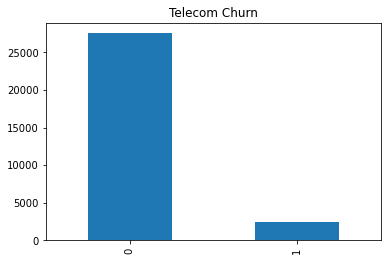

In [429]:
import matplotlib.pyplot as plt
telecom['churn'].value_counts().plot(kind='bar').set_title('Telecom Churn')

Let's drop all the columns from 9th month (September) as it is a churn phase we will not use it in analysis.

In [430]:
#telecom.drop(axis=1,labels=["onnet_mou_9","offnet_mou_9","roam_ic_mou_9","roam_mou_9","loc_og_t2t_mou_9","loc_og_t2m_mou_9","loc_og_t2f_mou_9","loc_og_t2c_mou_9",""])

In [431]:
telecom.shape

(29953, 197)

In [432]:
telecom=telecom[telecom.columns[~telecom.columns.str.contains('_9')]]

Now we dropped columns which have september month data.


In [433]:
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,Data_recharge_amount _of_6,Data_recharge_amount _of_7,Total_recharge_amount_6,Total_recharge_amount_7,Grand_total_recharge_amount,churned,churn
0,7000842753,109,0.0,0.0,0.0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,6/21/2014,7/16/2014,8/8/2014,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,614.0,504.0,559.0,0.00,1
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,6/27/2014,7/25/2014,8/26/2014,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,1580.0,790.0,1185.0,0.00,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0

Let's check is there are unique columns

In [434]:
unique_list = telecom.nunique()
unique_cols = unique_list[unique_list.values==1]

In [435]:
unique_cols

circle_id           1
loc_og_t2o_mou      1
std_og_t2o_mou      1
loc_ic_t2o_mou      1
std_og_t2c_mou_6    1
std_og_t2c_mou_7    1
std_og_t2c_mou_8    1
std_ic_t2o_mou_6    1
std_ic_t2o_mou_7    1
std_ic_t2o_mou_8    1
dtype: int64

In [436]:
#Dropping unique columns
telecom.drop(labels = list(unique_cols.index), axis =1, inplace=True)


Moving towards action phase ,Here we have to see whether the costomer is going to churn or not .For that we have to take out difference between 8th month with the avg of 6 and 7 months.

In [437]:
#deriving variables 
telecom["diff_arpu"]=telecom["arpu_8"]-((telecom["arpu_6"]+telecom["arpu_7"])/2)
telecom["diff_onnet_mou"]=telecom["onnet_mou_8"]-((telecom["onnet_mou_6"]+telecom["onnet_mou_6"])/2)
telecom["diff_roam_ic_mou"]=telecom["roam_ic_mou_8"]-((telecom["roam_ic_mou_6"]+telecom["roam_ic_mou_7"])/2)
telecom["diff_offnet_mou"]=telecom["offnet_mou_8"]-((telecom["offnet_mou_6"]+telecom["offnet_mou_6"])/2)
telecom["diff_roam_og_mou"]=telecom["roam_og_mou_8"]-((telecom["roam_og_mou_6"]+telecom["roam_og_mou_7"])/2)
telecom["diff_loc_og_t2t_mou"]=telecom["loc_og_t2t_mou_8"]-((telecom["loc_og_t2t_mou_6"]+telecom["loc_og_t2t_mou_7"])/2)
telecom["diff_loc_og_t2m_mou"]=telecom["loc_og_t2m_mou_8"]-((telecom["loc_og_t2m_mou_6"]+telecom["loc_og_t2m_mou_7"])/2)
telecom["diff_loc_og_t2f_mou"]=telecom["loc_og_t2f_mou_8"]-((telecom["loc_og_t2f_mou_6"]+telecom["loc_og_t2f_mou_7"])/2)
telecom["diff_loc_og_t2c_mou"]=telecom["loc_og_t2c_mou_8"]-((telecom["loc_og_t2c_mou_6"]+telecom["loc_og_t2c_mou_7"])/2)
telecom["diff_loc_og_mou"]=telecom["loc_og_mou_8"]-((telecom["loc_og_mou_6"]+telecom["loc_og_mou_7"])/2)


In [438]:
telecom["diff_std_og_t2t_mou"]=telecom["std_og_t2t_mou_8"]-((telecom["std_og_t2t_mou_6"]+telecom["std_og_t2t_mou_7"])/2)
telecom["diff_std_og_t2m_mou"]=telecom["std_og_t2m_mou_8"]-((telecom["std_og_t2m_mou_6"]+telecom["std_og_t2m_mou_7"])/2)
telecom["diff_std_og_t2f_mou"]=telecom["std_og_t2f_mou_8"]-((telecom["std_og_t2f_mou_6"]+telecom["std_og_t2f_mou_7"])/2)
telecom["diff_std_og_mou"]=telecom["std_og_mou_8"]-((telecom["std_og_mou_6"]+telecom["std_og_mou_7"])/2)


In [439]:
telecom["diff_isd_og_mou"]=telecom["isd_og_mou_8"]-((telecom["isd_og_mou_6"]+telecom["isd_og_mou_7"])/2)

telecom["diff_spl_og_mou"]=telecom["spl_og_mou_8"]-((telecom["spl_og_mou_6"]+telecom["spl_og_mou_7"])/2)
telecom["diff_og_others"]=telecom["og_others_8"]-((telecom["og_others_6"]+telecom["og_others_7"])/2)
telecom["diff_total_og_mou"]=telecom["total_og_mou_8"]-((telecom["total_og_mou_6"]+telecom["total_og_mou_7"])/2)


In [440]:
telecom["diff_loc_ic_t2t_mou"]=telecom["loc_ic_t2t_mou_8"]-((telecom["loc_ic_t2t_mou_6"]+telecom["loc_ic_t2t_mou_7"])/2)
telecom["diff_loc_ic_t2m_mou"]=telecom["loc_ic_t2m_mou_8"]-((telecom["loc_ic_t2m_mou_6"]+telecom["loc_ic_t2m_mou_7"])/2)
telecom["diff_loc_ic_t2f_mou"]=telecom["loc_ic_t2f_mou_8"]-((telecom["loc_ic_t2f_mou_6"]+telecom["loc_ic_t2f_mou_7"])/2)
telecom["diff_loc_ic_mou"]=telecom["loc_ic_mou_8"]-((telecom["loc_ic_mou_6"]+telecom["loc_ic_mou_7"])/2)


In [441]:
telecom["diff_std_ic_t2t_mou"]=telecom["std_ic_t2t_mou_8"]-((telecom["std_ic_t2t_mou_6"]+telecom["std_ic_t2t_mou_7"])/2)
telecom["diff_std_ic_t2m_mou"]=telecom["std_ic_t2m_mou_8"]-((telecom["std_ic_t2m_mou_6"]+telecom["std_ic_t2m_mou_7"])/2)
telecom["diff_std_ic_t2f_mou"]=telecom["std_ic_t2f_mou_8"]-((telecom["std_ic_t2f_mou_6"]+telecom["std_ic_t2f_mou_7"])/2)
telecom["diff_std_ic_mou"]=telecom["std_ic_mou_8"]-((telecom["std_ic_mou_6"]+telecom["std_ic_mou_7"])/2)
telecom["diff_total_ic_mou"]=telecom["total_ic_mou_8"]-((telecom["total_ic_mou_6"]+telecom["total_ic_mou_7"])/2)


In [442]:
telecom["diff_spl_ic_mou"]=telecom["spl_ic_mou_8"]-((telecom["spl_ic_mou_6"]+telecom["spl_ic_mou_7"])/2)
telecom["diff_isd_ic_mou"]=telecom["isd_ic_mou_8"]-((telecom["isd_ic_mou_6"]+telecom["isd_ic_mou_7"])/2)
telecom["diff_ic_others"]=telecom["ic_others_8"]-((telecom["ic_others_6"]+telecom["ic_others_7"])/2)

In [443]:
telecom["diff_total_rech_num"]=telecom["total_rech_num_8"]-((telecom["total_rech_num_6"]+telecom["total_rech_num_7"])/2)
telecom["diff_total_rech_amt"]=telecom["total_rech_amt_8"]-((telecom["total_rech_amt_6"]+telecom["total_rech_amt_7"])/2)
telecom["diff_max_rech_amt"]=telecom["max_rech_amt_8"]-((telecom["max_rech_amt_6"]+telecom["max_rech_amt_7"])/2)
telecom["diff_last_day_rch_amt"]=telecom["last_day_rch_amt_8"]-((telecom["last_day_rch_amt_6"]+telecom["last_day_rch_amt_7"])/2)
telecom["diff_total_rech_data"]=telecom["total_rech_data_8"]-((telecom["total_rech_data_6"]+telecom["total_rech_data_7"])/2)
telecom["diff_av_rech_amt_data"]=telecom["av_rech_amt_data_8"]-((telecom["av_rech_amt_data_6"]+telecom["av_rech_amt_data_7"])/2)



In [444]:
telecom["diff_vol_2g_mb"]=telecom["vol_2g_mb_8"]-((telecom["vol_2g_mb_6"]+telecom["vol_2g_mb_7"])/2)
telecom["diff_vol_3g_mb"]=telecom["vol_3g_mb_8"]-((telecom["vol_3g_mb_6"]+telecom["vol_3g_mb_7"])/2)
telecom["diff_monthly_2g"]=telecom["monthly_2g_8"]-((telecom["monthly_2g_6"]+telecom["monthly_2g_7"])/2)
telecom["diff_sachet_2g"]=telecom["sachet_2g_8"]-((telecom["sachet_2g_6"]+telecom["sachet_2g_7"])/2)
telecom["diff_sachet_3g"]=telecom["sachet_3g_8"]-((telecom["sachet_3g_6"]+telecom["sachet_3g_7"])/2)
telecom["diff_monthly_3g"]=telecom["monthly_3g_8"]-((telecom["monthly_3g_6"]+telecom["monthly_3g_7"])/2)
telecom["diff_vbc_3g"]=telecom["aug_vbc_3g"]-((telecom["jun_vbc_3g"]+telecom["jul_vbc_3g"])/2)

Let's drop some more columns which are not necessary for analysis such as date ,september vbc 3g,and more

In [445]:
telecom.shape

(29953, 185)

In [446]:
telecom.drop(axis=1,labels=["mobile_number","sep_vbc_3g","Data_recharge_amount _of_6","Data_recharge_amount _of_7","Total_recharge_amount_6","Total_recharge_amount_7","Grand_total_recharge_amount","churned","date_of_last_rech_8","date_of_last_rech_7","date_of_last_rech_6"],inplace=True)

In [447]:
telecom.shape

(29953, 174)

In [448]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
telecom.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,diff_arpu,diff_onnet_mou,diff_roam_ic_mou,diff_offnet_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_monthly_2g,diff_sachet_2g,diff_sachet_3g,diff_monthly_3g,diff_vbc_3g
count,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,29953.000000,2

## Let's do univariate and bivariate analysis to find out outliers.

In [449]:
categorical=["churn","sachet_3g_8","sachet_3g_7","sachet_3g_6","monthly_3g_8","monthly_3g_7","monthly_3g_6","monthly_2g_8","monthly_2g_7","monthly_2g_6"]
tele = telecom.drop(categorical,axis=1)


In [450]:
low = .05
high = .95
quant_df = tele.quantile([low, high])
print(quant_df)

         arpu_6     arpu_7     arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0.05   112.5288   114.4028     9.6158        0.000        0.000        0.000   
0.95  1241.6494  1261.8856  1255.0864     1135.808     1187.712     1075.384   

      offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0.05         0.230          0.06          0.00          0.000           0.00   
0.95      1256.662       1272.43       1167.62         84.628          55.64   

      roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0.05          0.000          0.000          0.000          0.000   
0.95         56.362        145.562        104.316        100.692   

      loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0.05             0.000              0.00             0.000             0.000   
0.95           322.848            324.65           299.542           604.442   

      loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_m

In [451]:
filt_df = tele.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [452]:
filt_df.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,diff_arpu,diff_onnet_mou,diff_roam_ic_mou,diff_offnet_mou,diff_roam_og_mou,diff_loc_og_t2t_mou,diff_loc_og_t2m_mou,diff_loc_og_t2f_mou,diff_loc_og_t2c_mou,diff_loc_og_mou,diff_std_og_t2t_mou,diff_std_og_t2m_mou,diff_std_og_t2f_mou,diff_std_og_mou,diff_isd_og_mou,diff_spl_og_mou,diff_og_others,diff_total_og_mou,diff_loc_ic_t2t_mou,diff_loc_ic_t2m_mou,diff_loc_ic_t2f_mou,diff_loc_ic_mou,diff_std_ic_t2t_mou,diff_std_ic_t2m_mou,diff_std_ic_t2f_mou,diff_std_ic_mou,diff_total_ic_mou,diff_spl_ic_mou,diff_isd_ic_mou,diff_ic_others,diff_total_rech_num,diff_total_rech_amt,diff_max_rech_amt,diff_last_day_rch_amt,diff_total_rech_data,diff_av_rech_amt_data,diff_vol_2g_mb,diff_vol_3g_mb,diff_monthly_2g,diff_sachet_2g,diff_sachet_3g,diff_monthly_3g,diff_vbc_3g
count,26957.000000,26957.000000,26957.000000,25866.000000,25809.000000,24845.000000,26959.000000,26955.000000,26056.000000,4850.000000,3555.000000,3832.000000,4870.000000,3612.000000,3807.000000,24627.000000,24716.000000,23403.000000,25906.000000,25972.000000,24715.000000,13367.000000,13622.000000,12884.000000,5850.000000,6252.000000,6050.000000,26116.000000,26158.000000,24911.000000,15296.000000,15182.000000,14008.000000,19654.000000,19376.000000,18060.000000,3106.000000,2916.000000,2709.000000,21332.000000,21050.000000,19833.000000,843.000000,732.000000,395.000000,14357.000000,15371.000000,14735.000000,5334.000000,0.0,0.0,26662.000000,26680.000000,25516.000000,25702.000000,25911.000000,24743.000000,26878.000000,26955.000000,25922.000000,18293.000000,18696.000000,18116.000000,26955.000000,26957.000000,26110.000000,14652.000000,14943.000000,13955.000000,20319.000000,20291.000000,19109.000000,6151.000000,6347.000000,6072.000000,22956.000000,22990.000000,21874.000000,26957.000000,26957.000000,26230.000000,5060.000000,464.000000,1045.000000,5122.000000,5381.000000,4894.000000,6197.000000,5647.000000,5915.000000,26058.000000,25774.000000,26665.000000,26950.000000,26920.000000,26220.000000,26750.000000,26612.000000,26221.000000,23282.000000,22305.000000,20072.000000,14892.000000,15318.000000,14116.000000,15241.00000,15382.000000,14437.000000,13487.000000,13644.000000,12301.000000,9129.000000,9731.000000,9000.000000,7240.000000,7239.000000,6663.000

In [453]:
filt_df.shape

(29953, 164)

In [454]:
telecom.shape

(29953, 174)

<AxesSubplot:xlabel='diff_av_rech_amt_data'>

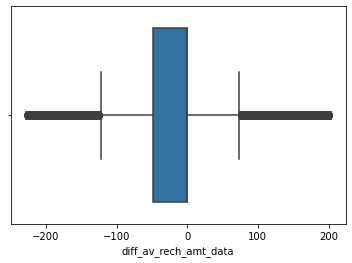

In [455]:
sns.boxplot(x=filt_df["diff_av_rech_amt_data"])

<AxesSubplot:xlabel='diff_total_rech_data'>

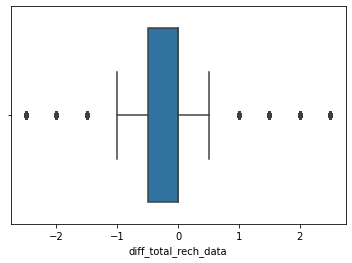

In [456]:
sns.boxplot(x=filt_df["diff_total_rech_data"])

In [457]:
#max_threshold=telecom["diff_total_rech_data"].quantile(0.95)
#min_threshold=telecom["diff_total_rech_data"].quantile(0.001)
#telecom["diff_total_rech_data"]=telecom[(telecom["diff_total_rech_data"]<max_threshold)&(telecom["diff_total_rech_data"]>min_threshold)]


<AxesSubplot:xlabel='diff_arpu'>

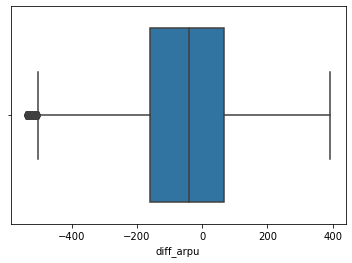

In [458]:
sns.boxplot(x=filt_df["diff_arpu"])

<AxesSubplot:xlabel='diff_onnet_mou'>

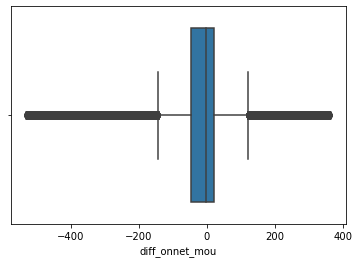

In [459]:
sns.boxplot(x=filt_df["diff_onnet_mou"])

<AxesSubplot:xlabel='jun_vbc_3g'>

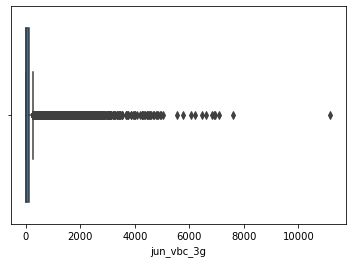

In [460]:
sns.boxplot(x=telecom["jun_vbc_3g"])

Here we can see there are lots of outliers
lets do bivariate analysis.

<AxesSubplot:xlabel='diff_vol_2g_mb', ylabel='diff_vol_3g_mb'>

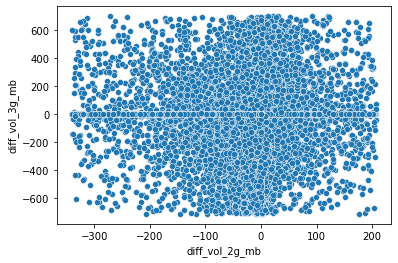

In [461]:
sns.scatterplot(x="diff_vol_2g_mb",y="diff_vol_3g_mb",data=filt_df)

<AxesSubplot:xlabel='diff_monthly_2g', ylabel='diff_monthly_3g'>

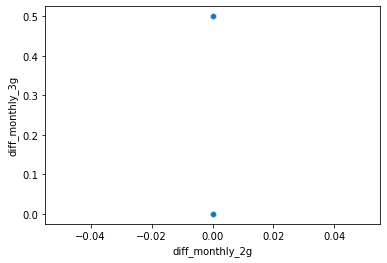

In [462]:
sns.scatterplot(x="diff_monthly_2g",y="diff_monthly_3g",data=filt_df)

<AxesSubplot:xlabel='diff_sachet_2g', ylabel='diff_sachet_3g'>

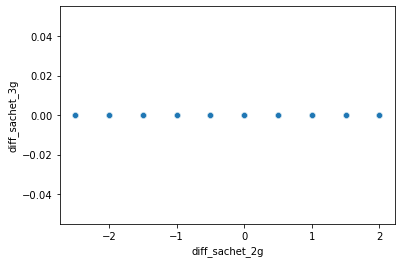

In [463]:
sns.scatterplot(x="diff_sachet_2g",y="diff_sachet_3g",data=filt_df)

<AxesSubplot:xlabel='total_rech_amt_8', ylabel='Density'>

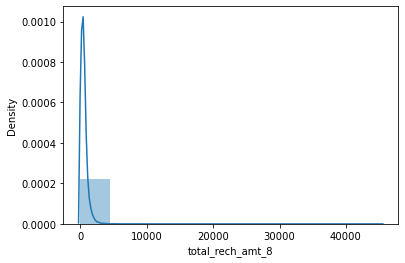

In [464]:
sns.distplot(telecom.total_rech_amt_8,bins=10)

# 3.Data Preparation

Churn Rate

In [465]:
telecom["churn"].value_counts(normalize=True)

0    0.918773
1    0.081227
Name: churn, dtype: float64

Feature Standardisation

In [466]:
from sklearn.preprocessing import StandardScaler

In [467]:
scaler = StandardScaler()
y=telecom.pop("churn")
#X=telecom.copy()
#x = scaler.fit_transform(X)

In [468]:
X=telecom.copy()
x = scaler.fit_transform(X)

In [469]:
x[:5,:5]

array([[-0.78426126, -0.72152035, -0.58767359, -0.56736626, -0.55809788],
       [ 1.10740649,  1.64303291,  5.30261258, -0.44158491, -0.44425123],
       [-0.39078864, -0.14361376, -0.73990771,  0.33226178,  0.17276511],
       [-0.09627003,  0.07623102,  0.25664716, -0.34466108, -0.28303789],
       [-1.05122923, -0.76509974, -0.28264572, -0.46089574, -0.45262109]])

### We can see  churn rate is too low around 8 %.This is imbalance data.

# Model Building
Let's start by splitting our data into a training set and a test set.

Splitting Data into Training and Test Sets

In [470]:
from sklearn.model_selection import train_test_split

#Putting feature variable to X
#X = telecom.drop(['churn'],axis=1)

#Putting response variable to y
#y = telecom['churn']

#y.head()

In [471]:
#Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7,test_size=0.3,random_state=100,stratify=y)

## Applying PCA on the data

Note -
While computng the principal components, we must not include the entire dataset. Model building is all about doing well on the data we haven't seen yet!
So we'll calculate the PCs using the train data, and apply them later on the test data

In [472]:
from sklearn.decomposition import PCA

In [473]:
pca = PCA(random_state=42)


In [474]:
pca.fit(X_train)

PCA(random_state=42)

In [475]:
pca.components_

array([[ 1.47027058e-01,  1.57158397e-01,  1.60161913e-01, ...,
         1.05771791e-02,  1.96704975e-02,  1.24796764e-02],
       [-1.83376292e-02, -8.90006257e-03,  2.86479924e-02, ...,
         4.79389425e-03,  8.31092868e-03,  7.17494732e-03],
       [-4.52855467e-02,  4.55849885e-02,  1.58157031e-01, ...,
         3.88623019e-02,  5.09317424e-02,  3.95849128e-02],
       ...,
       [-0.00000000e+00,  2.15105711e-16,  3.41876460e-16, ...,
        -2.41621312e-01,  5.27100681e-02, -3.36459349e-02],
       [ 0.00000000e+00,  4.89192020e-16, -2.16950982e-16, ...,
         3.25688078e-02,  2.03188793e-01, -3.46970988e-02],
       [ 0.00000000e+00, -8.52182908e-17, -6.80619798e-16, ...,
         1.34725251e-02, -9.86107192e-03,  5.62468881e-02]])

In [476]:
pca.explained_variance_ratio_

array([8.21619549e-02, 6.39925225e-02, 5.22662268e-02, 4.19823239e-02,
       3.40824775e-02, 3.34077016e-02, 2.62460458e-02, 2.48382359e-02,
       2.25069869e-02, 2.16346748e-02, 2.11279912e-02, 2.02475002e-02,
       1.89549166e-02, 1.86112927e-02, 1.75113801e-02, 1.72499664e-02,
       1.63363214e-02, 1.57074835e-02, 1.53359238e-02, 1.50919202e-02,
       1.49412532e-02, 1.43222744e-02, 1.33349642e-02, 1.32365457e-02,
       1.31846454e-02, 1.23227178e-02, 1.22307852e-02, 1.19724404e-02,
       1.10663832e-02, 1.09190346e-02, 1.03169990e-02, 1.01872512e-02,
       1.00848334e-02, 9.78068497e-03, 9.47296094e-03, 9.21365591e-03,
       8.77032242e-03, 8.15630482e-03, 8.02893456e-03, 7.86904747e-03,
       7.57748942e-03, 7.49255170e-03, 7.38613264e-03, 7.31855276e-03,
       7.17552949e-03, 6.76009702e-03, 6.45519507e-03, 6.40710502e-03,
       6.19421583e-03, 6.05545779e-03, 5.96899504e-03, 5.65573493e-03,
       5.53884553e-03, 5.41468350e-03, 5.23116036e-03, 5.13960110e-03,
      

In [477]:
import matplotlib.pyplot as plt

<BarContainer object of 173 artists>

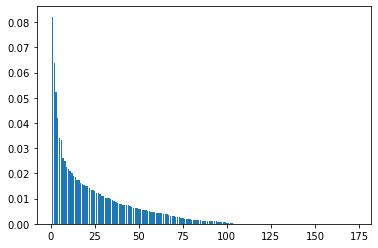

In [478]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [479]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

### Making the scree plot

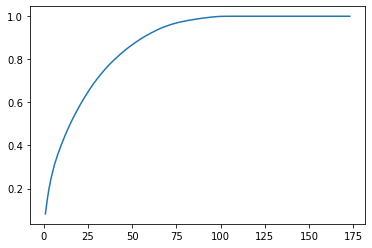

In [480]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

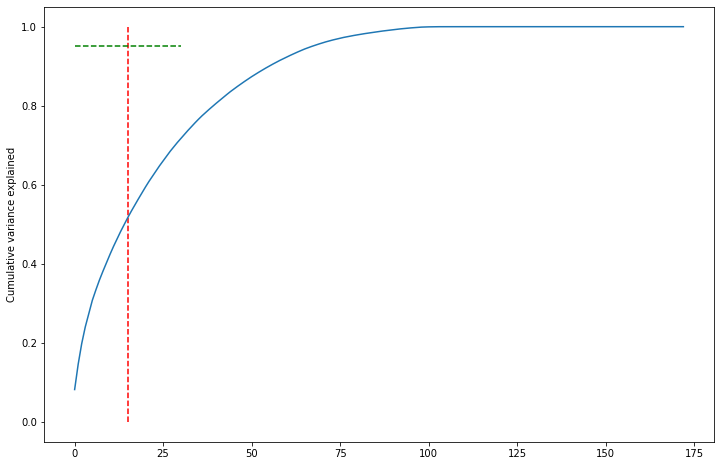

In [481]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 20 components

In [482]:
#pc20 = PCA(n_components=20, random_state=42)

In [483]:
from sklearn.decomposition import IncrementalPCA

In [484]:
pca_final = IncrementalPCA(n_components=50)

In [485]:
df_train_pca = pca_final.fit_transform(X_train)

In [486]:
df_train_pca.shape

(20967, 50)

In [487]:
corrmat = np.corrcoef(df_train_pca.transpose())

In [488]:
corrmat.shape

(50, 50)

### Plotting the heatmap of the corr matrix

<AxesSubplot:>

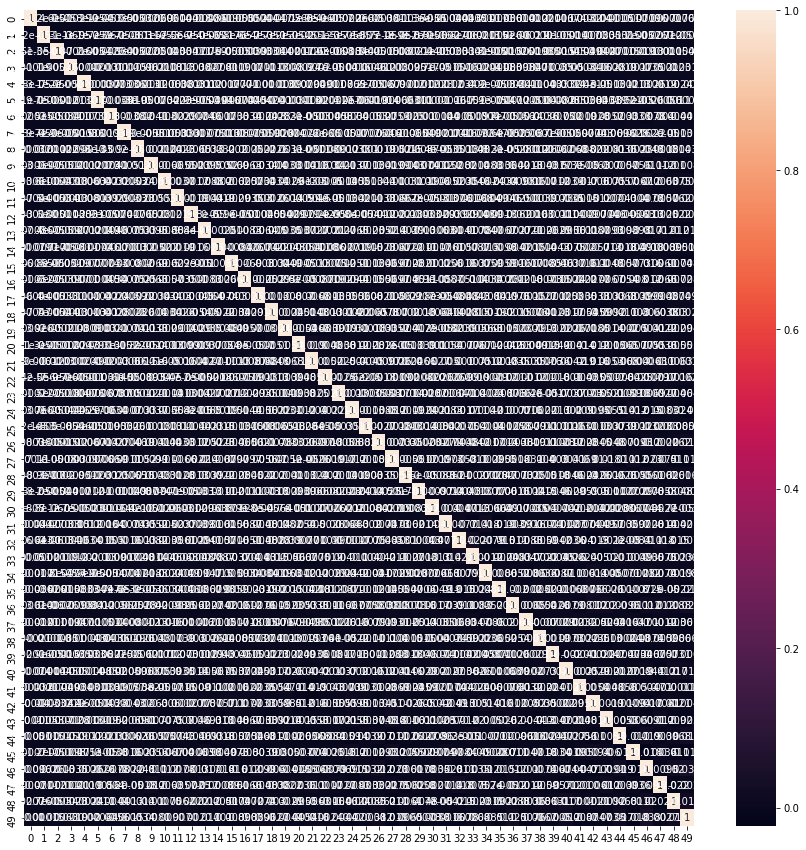

In [489]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

Applying the transformation on the test set

In [490]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8986, 50)

Applying logistic regression on the data on our Principal components

In [491]:
from sklearn.linear_model import LogisticRegression

In [492]:
learner_pca = LogisticRegression()

In [493]:
model_pca = learner_pca.fit(df_train_pca, y_train)

Making predictions on the test set

In [494]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

In [495]:

"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.9'

In [496]:
"{:2.2}".format(metrics.accuracy_score(y_test,  pred_probs_test[:,1].round()))

'0.93'

In [497]:
"{:2.2}".format(metrics.recall_score(y_test,  pred_probs_test[:,1].round()))

'0.25'

### Logistic Regression model has 0.93 accuracy  and Recall Value of 0.89 roc score 

### Normalization

In [498]:
scaler = StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, train_size=0.7, test_size=0.3, random_state=100)

### RFE 

In [499]:
rfe = RFE(learner_pca, 20)            
rfe = rfe.fit(X_train, y_train)

In [500]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 18),
 ('arpu_7', False, 71),
 ('arpu_8', False, 115),
 ('onnet_mou_6', False, 100),
 ('onnet_mou_7', False, 12),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 75),
 ('offnet_mou_7', False, 87),
 ('offnet_mou_8', False, 19),
 ('roam_ic_mou_6', False, 121),
 ('roam_ic_mou_7', False, 89),
 ('roam_ic_mou_8', False, 154),
 ('roam_og_mou_6', False, 101),
 ('roam_og_mou_7', False, 9),
 ('roam_og_mou_8', False, 76),
 ('loc_og_t2t_mou_6', False, 41),
 ('loc_og_t2t_mou_7', False, 151),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_6', False, 22),
 ('loc_og_t2m_mou_7', False, 88),
 ('loc_og_t2m_mou_8', False, 149),
 ('loc_og_t2f_mou_6', False, 79),
 ('loc_og_t2f_mou_7', False, 11),
 ('loc_og_t2f_mou_8', False, 145),
 ('loc_og_t2c_mou_6', False, 58),
 ('loc_og_t2c_mou_7', False, 59),
 ('loc_og_t2c_mou_8', False, 124),
 ('loc_og_mou_6', False, 78),
 ('loc_og_mou_7', False, 125),
 ('loc_og_mou_8', False, 109),
 ('std_og_t2t_mou_6', False, 26),
 ('std_og_t2t_mou_7', False

In [501]:
col = X_train.columns[rfe.support_]

### Random forest Grid search Best score and parameter


### Commented Below grid Search as it takes more time to finish 

In [502]:
# GridSearchCV to find optimal min_samples_split 
#param_grid = {
#   'max_depth': [8,12,16],
#  'min_samples_leaf': range(100, 800, 200),
# 'min_samples_split': range(200, 1000, 200),
#'n_estimators': [100,200, 300], 
#'max_features': [6,9,12]
#}
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,scoring= 'roc_auc', 
#                          cv = 3, n_jobs = -1,verbose = 1)

#grid_search.fit(X_train[col],y_train)

In [503]:
#print(' Best Score ',grid_search.best_score_,'using',grid_search.best_params_)

### Best Score  0.9082183760546663 using {'max_depth': 12, 'max_features': 9, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}

### Final Model 

In [504]:
# model with the best hyperparameters

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=9,
                             n_estimators=300)


rfc.fit(X_train[col],y_train)
predictions = rfc.predict(X_test[col])
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8305
           1       0.76      0.46      0.57       681

    accuracy                           0.95      8986
   macro avg       0.86      0.72      0.77      8986
weighted avg       0.94      0.95      0.94      8986



In [505]:
# metrics
print(metrics.confusion_matrix(y_test, predictions), "\n")
print("accuracy", metrics.accuracy_score(y_test, predictions))
print("precision", metrics.precision_score(y_test, predictions))
print("sensitivity/recall", metrics.recall_score(y_test, predictions))
print("roc_auc_score", metrics.roc_auc_score(y_test, predictions))

[[8207   98]
 [ 367  314]] 

accuracy 0.9482528377476074
precision 0.7621359223300971
sensitivity/recall 0.461086637298091
roc_auc_score 0.7246432584443496


### Random Forest Grid Search Model has accuracy 0.94 , roc_auc_score 0.72, recall 0.45 

In [506]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      8305
           1       0.76      0.46      0.57       681

    accuracy                           0.95      8986
   macro avg       0.86      0.72      0.77      8986
weighted avg       0.94      0.95      0.94      8986



In [507]:
def plot_feature_importances(clf, X_train, y_train=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_train and y_train are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_train     (pandas DataFrame)
        
        y_train     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    '''
    
    __name__ = "plot_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_train.values, y_train.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except ( ValueError):
        clf.fit(X_train.values, y_train.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='importance', ascending=False))
        
    return feat_imp

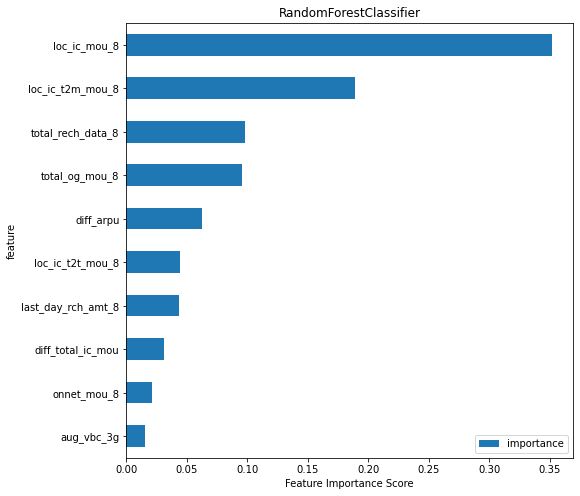

,importance
feature,
aug_vbc_3g,0.015454
onnet_mou_8,0.020930
diff_total_ic_mou,0.031011
last_day_rch_amt_8,0.043485
loc_ic_t2t_mou_8,0.044293
diff_arpu,0.062618
total_og_mou_8,0.095915
total_rech_data_8,0.097783
loc_ic_t2m_mou_8,0.188821


In [508]:
plot_feature_importances(rfc, X_train[col], y_train, top_n=10,title=rfc.__class__.__name__)

### Most Important Feature 

#### Random Forest Grid Search Model has accuracy 0.94 , roc_auc_score 0.72, recall 0.45 

#### loc_og_t2t_mou_8
#### onnet_mou_8
#### diff_total_ic_mou
#### loc_ic_t2t_mou_8
#### last_day_rch_amt_8
#### diff_arpu
#### total_og_mou_8
#### total_rech_data_8
#### loc_ic_t2m_mou_8
#### loc_ic_mou_8